# Author

**I Made Satria Bimantara** 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# References
***
1. https://www.analyticsvidhya.com/blog/2022/02/statistical-inference-using-python/
2. https://towardsdatascience.com/statistical-inference-in-pyhton-using-pandas-numpy-part-i-c2ac0320dffe
3. https://medium.com/codex/statistics-for-data-analysts-inferential-statistics-with-python-de8b7f49cfa

# Inferentia Statistics

## Definitions

- Statistika Inferensia membahas cara menganalisis data serta mengambil kesimpulan yang digunakan dalam pengambilan keputusan.
- Metode ini berkaitan dengan analisis sebagian data sampai ke peramalan atau penarikan kesimpulan mengenai keseluruhan data. Metode statistika yang digunakan untuk mengambil kesimpulan dari sampel data yang mewakili keseluruhan data (populasi) (Purnama, 2019). 
- Statistika Inferensia akan menghasilkan generalisasi (jika sampel representatif). (E.g: Quick count pemilu). Intinya: **mengambil kesimpulan terhadap suatu populasi dari sampel data**. 
- Untuk memahami statistika inferensia, pemahaman beberapa bidang ilmu lain harus dikuasai terlebih dahulu, seperti teori peluang dan teori himpunan. Hal tersebut dikarenakan keakuratan dalam statistika dapat dilihat dari tingkat kesalahan, dimana tingkat kesalahan dihitung menggunakan konsep peluang
***
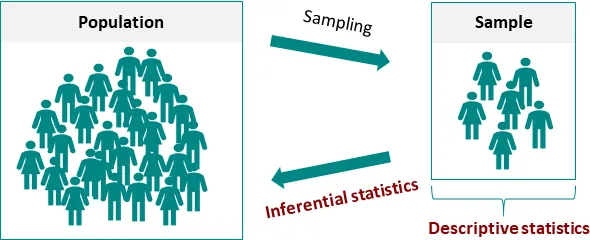
***
**Notes!** <br>
inferential statistics uses sample data **to make conclusions about the population**.

## Sampling dan Sampling Methods
***
**Sampling** <br>
- Mengumpulkan data dari semua populasi secara keseluruhan **membutuhkan effort yang besar**
- karena keterbatasan ini, bagian terkecil dari populasi (sampel) dianalisis dan diinferensi untuk menyatakan kesimpulan terhadap populasi
- Harus diperhatikan bahwa sampel yang dikoleksi harus bisa merepresentasikan populasi, ini dipengaruhi dari ukuran sampel serta teknik sampling yang digunakan

***
**Sampling Methods** <br>
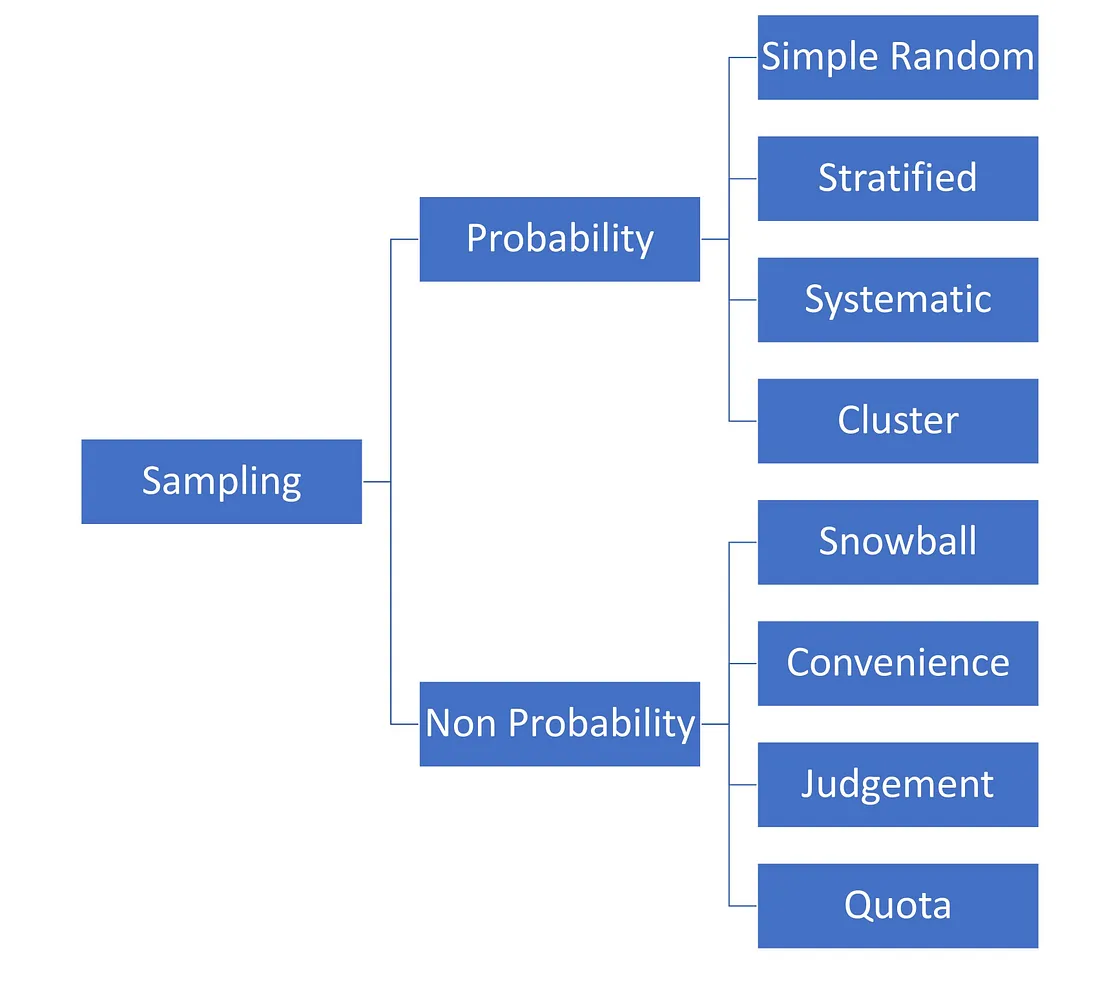
***
1. **Simple Random Sampling** 
- Simple Random Sampling is the simplest, and most common technique. 
- Here, every element in the population has an equal chance of being selected.

2. **Stratified Random Sampling** 
- In this case, the population is divided into groups of related elements called strata. 
- Samples are then collected from each stratum. For example, data might be collected from the population in strata of different age groups instead of at complete random.

**Bagaimana cara menentukan jumlah sampel optimal?** <br>
The determination of sample size depends on three major factors, such as:
1. Confidence Level
- **Defition**: Menyatakan probabilitas nilai dari parameter berada diantara rentang nilai yang telah dispesifikasikan
2. Maximum Permissible Error
- **Definition**: Perbedaan nilai antara nilai asli dengan nilai hasil prediksi
3. Population Variance / Population Standard Deviation
- **Definition**: Nilai dari standard deviation yang dihitung berdasarkan populasi dari data
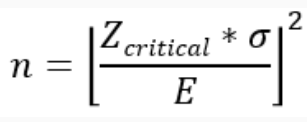
***
*Keterangan* <br>
1. n: ukuran sampel
2. Zcritical: critical Z statistics for the specified confidence level
3. tau = population standard deviation
4. E = maximum permissible error

The critical Z value for a specified confidence level is found in the Z table. Z table for various confidence levels is given below.
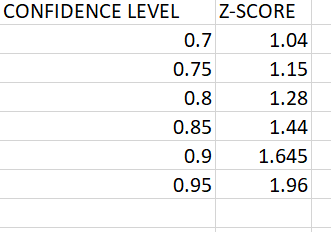

### Example Random Sampling
***

In [2]:
# import library
import random
random.seed(120) #Prevents samples from changing each time code is run

fruits = ['mango', 'orange','apple','pawpaw','guava','strawberry','blackberry','cucumber','lemon']
fruit_sample = random.sample(fruits, k=3) # Three fruits are selected from the list of 9 fruits
print (fruit_sample)

#Output: ['lemon', 'pawpaw', 'orange']

['lemon', 'pawpaw', 'orange']


### Example Stratified Random Sampling
***
- If we use Stratified Sampling, the population is divided into groups based on characteristics. these groups are called Strata.
- The sample is chosen randomly from each of these groups.

**Case Study**
- Suppose you have a list of 12 employees along with their department and job level information
- You can sample the data by grouping it based on department and job level. There are two departments (D1 and D2) and two job levels (2 and 3).
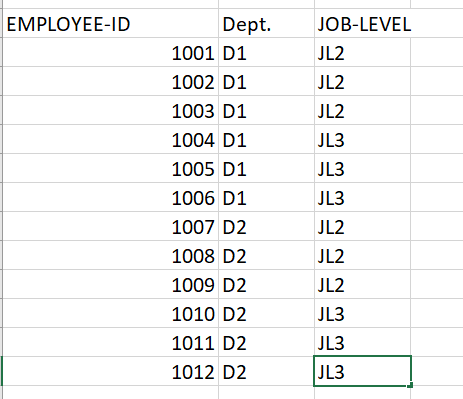

In [3]:
# create data dummy automatically
employee_data = []

for i in range(1,13):
    employee_id = "100"+str(i)
    if i>=1 and i<=6:
        dept = 'D1'
    else:
        dept = 'D2'
    
    if (i>=1 and i<=3) or (i>=7 and i<=9):
        job_level = 'JL2'
    else:
        job_level = 'JL3'
    
    employee_data.append([employee_id, dept, job_level])

# buat data dalam bentuk dataframe
employee_data = pd.DataFrame(employee_data, columns=['employee_id', 'Dept', 'Job_level'])

In [4]:
employee_data

,employee_id,Dept,Job_level
0,1001,D1,JL2
1,1002,D1,JL2
2,1003,D1,JL2
3,1004,D1,JL3
4,1005,D1,JL3
5,1006,D1,JL3
6,1007,D2,JL2
7,1008,D2,JL2
8,1009,D2,JL2
9,10010,D2,JL3


In [5]:
#Taking a random sample from the population using the groupby function based on Department and Job Level
employee_data.groupby(['Dept','Job_level'], group_keys=False).apply(lambda x: x.sample(1))

,employee_id,Dept,Job_level
0,1001,D1,JL2
3,1004,D1,JL3
6,1007,D2,JL2
11,10012,D2,JL3


## Confidence Interval

### Introduction 

- Confidence ineterval atau CI adalah estimasi yang dihitung dari data statistik yang diamati. 
- CI mengukur seberapa akurat Mean sebuah sampel **dapat mewakili nilai mean populasi** sesungguhnya. 
- CI juga diartikan sebagai rentang antara dua nilai dimana suatu **population Mean tepat berada diantaranya** dengan suatu tingkat kepercayaan tertentu

### Still Confuse?
***
- Imagine you ask me my height. I could say that I’m 1.93 m tall, but I’m not giving you any information about the uncertainty of this measure. 
- Confidence intervals are intervals in which we have a certain confidence to find the real value of the observable we measure.
- Scientists usually search for the **95% confidence interval**, but it’s very common to use **90% or even 99%** as well. So, when you ask me about my height, I should answer you with an error estimate or with a confidence interval, like “with a 95% confidence I’m from 1.92 m to 1.93 m tall”.

### Dive Deep into the concept of the Confidence Interval
***
For some reason, **I believe it is much better to understand concepts** through relatable examples rather than raw mathematical definitions. So let’s get started.
***
- suppose, you live in a city of **population 100,000** and an election is around the corner. 
- As a pollster, you must forecast who is going to win the election either blue party or yellow. 
- So, you see it is almost ***impossible*** to collect information from the entire population so you randomly pick **100 people (sample)**. 
- At the end of the survey, you found **that 62% of people are going to vote for yellow**. 

**Question** <br>
- is should we conclude that yellow is going to win with a win probability of 62% or 62% of the entire population will be voting for yellow? 
- Well, the answer is NO. 
- We don’t know for sure how far our estimation is from the true **parameter**.
- if we take another sample the result may turn out to be 58% or 65%. 
- So, what we will do instead is to **find a range of values around our sample statistic that will most likely capture the true population proportion**. Here, the proportion refers to the percentage of people voting yellow.

### Big Idea
**CONFIDENCE INTERVAL** : an interval of where to find the real value of the observable.

### Confidence Interval Formula
***
- I’ll cover the calculation of the confidence interval on the mean value of a sample, which is an estimate of the population expected value.
- Given ***m*** the mean value, ***s*** the sample standard deviation and ***N*** the sample size, the confidence interval is defined by the following formula:
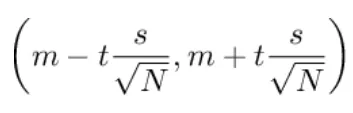
- There’s a ***t*** parameter, as you can see, which is related to the confidence we want. 
- The calculation of this parameter (***t***) can be done in different ways. If our sample size is small (i.e. less than 30 points), we can use Student’s t distribution to calculate it.
- If the sample size is large (i.e. larger than 30 points), we can approximate Student’s t distribution with a normal distribution 

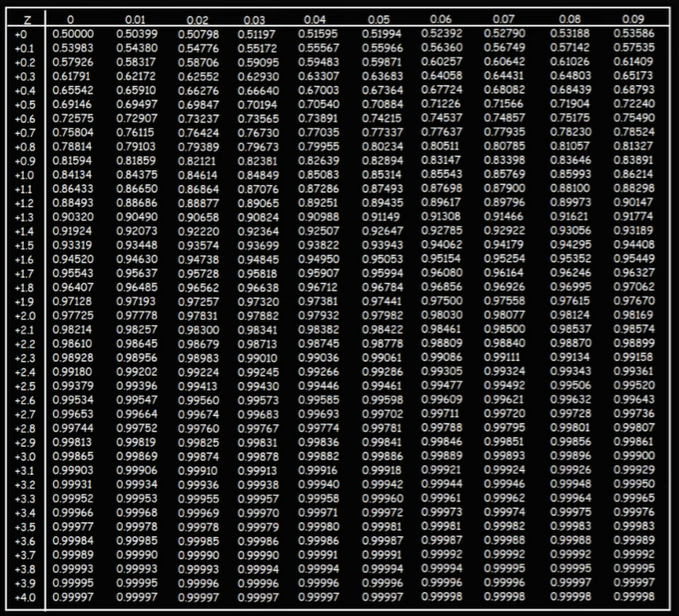

**How to Find z score from given Confidence Interval?** <br>
***
*Formula* <br>
Al = (1 + CI) / 2 <br>
- Cari nilai Al pada tabel Z score lalu tambahkan label index dan label kolom untuk z tabel yang memuat z score

**NOTES!** <br>
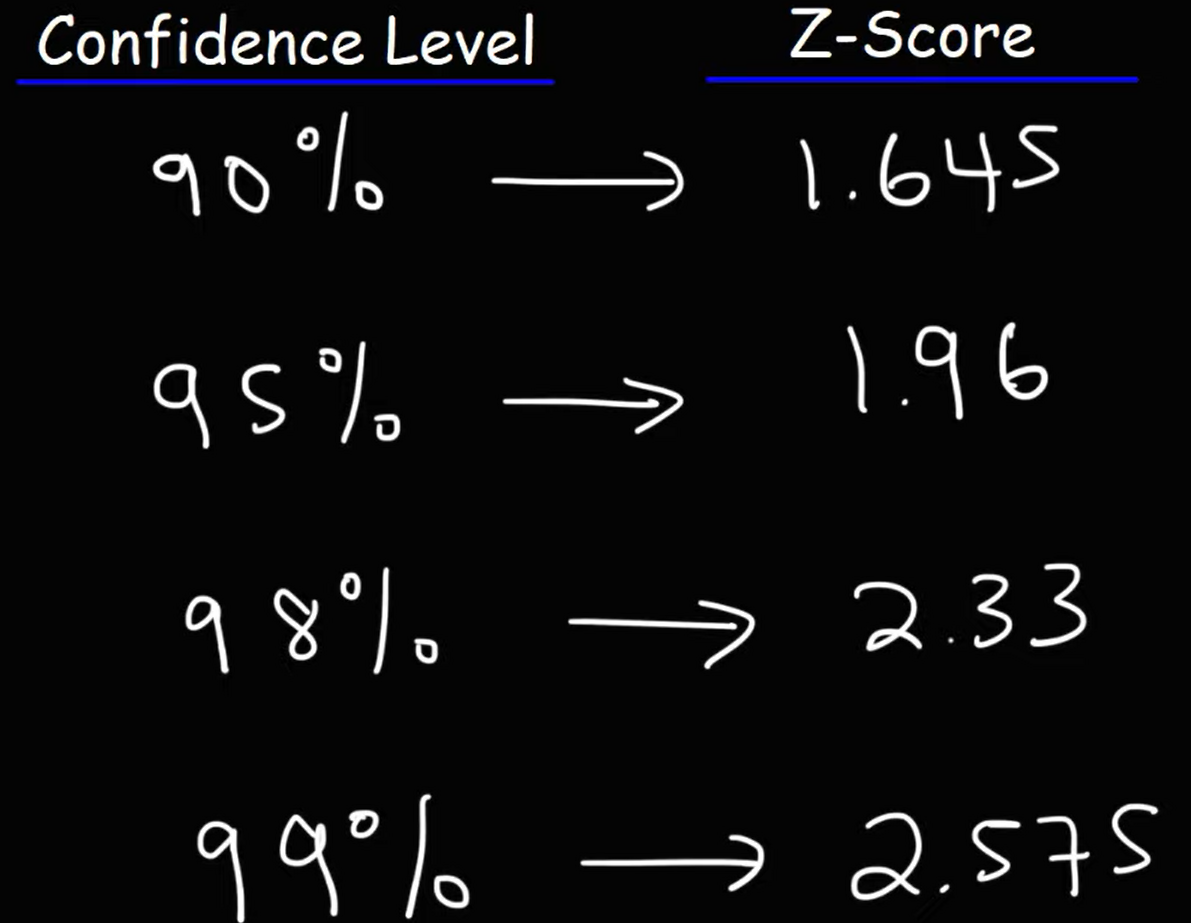
How to calculate z_score based on confidence level: https://www.youtube.com/watch?v=sJyZ9vRhP7o

### More about Confidence Interval
***
- Be aware about assumption in CI.
- Sample size >= 30 and population standard deviation is know : Use Z-statiscs
- In real life, we don’t have population parameters so we will go with z or t based on sample size.
- Sample size < 30: Student's t-distribution is used

**T-distribution in short** <br>
The t-distribution is similar to normal distribution but takes different shapes depending on the sample size. Instead of z values, t values are used which are larger for smaller samples, producing a larger margin of error.

### Example Case Study 1 (Confidence Interval using Z-statistics)
***
The average test score in a physics class is normally distributed with a standard deviation of 5,4. 50 skor diperoleh secara random dengan rerata skor sebesar 79: <br>
- (a) Find a 95% confidence interval for the population mean test score
- (b) What is the value of the margin of error?

In [6]:
# write all the informations from statement
sample_standard_deviation = 5.4
number_of_samples = 50
sample_mean = 79
confidence_interval = 0.95

In [7]:
import scipy

# find z_score critical value
# we will using library rather than find manually in z score table
al = (1 + confidence_interval)/2
z_score = scipy.stats.norm.ppf(al)
al, z_score

(0.975, 1.959963984540054)

In [8]:
# hitung CI untuk batas bawah dan batas atas
batas_bawah = sample_mean - (z_score * (sample_standard_deviation/np.sqrt(number_of_samples)))
batas_atas = sample_mean + (z_score * (sample_standard_deviation/np.sqrt(number_of_samples)))
ci = (batas_bawah, batas_atas)
ci

(77.50322386970235, 80.49677613029765)

**Analysis** <br>
**We can say 95% confidence interval that population mean of physics score falls between 77,50322 - 80,496**

### Example Real Case Study (Real Problem Dataset)
***
**Pertanyaan** <br>
1. Apakah mungkin kita bisa menghitung rata-rata tingkat kolesterol populasi perempuan hanya menggunakan contoh sampel data? Seberapa yakin kita akan nilai rata-rata tersebut?

**Penyelesaian** <br>
- Kita akan gunakan dataset sampel mengenai histori riwayat medis beberapa orang (heart.csv)
- Akses dataset di : https://raw.githubusercontent.com/satriabimantara/H8_001/master/Sesi%2010/data/heart.csv

#### Collect Sample Dataset

In [9]:
heart_sample_dataset = pd.read_csv('https://raw.githubusercontent.com/satriabimantara/H8_001/master/Sesi%2010/data/heart.csv')

In [10]:
heart_sample_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
heart_sample_dataset.shape

(1025, 14)

#### Data Understanding
***
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
10. exercise induced angina
11. oldpeak = ST depression induced by exercise relative to rest
12. the slope of the peak exercise ST segment
13. number of major vessels (0-3) colored by flourosopy
14. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [12]:
# replace value gender
heart_sample_dataset['Sex1'] = heart_sample_dataset['sex'].replace({1:"Male",0:'Female'})

In [13]:
heart_sample_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Female


#### Data Preprocessing

In [14]:
heart_sample_dataset.dropna(inplace=True)

In [15]:
heart_sample_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Female


#### Data Processing and Analysis

In [16]:
heart_sample_dataset.groupby('Sex1').agg({'chol':[np.mean,np.std,np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [17]:
# write all the information from that table
col_mean_sample = 261.455128
col_std_sample = 64.466781
n_sample = 312

In [18]:
# find z_score critical value
# we will using library rather than find manually in z score table
confidence_interval = 0.95
al = (1 + confidence_interval)/2
z_score = scipy.stats.norm.ppf(al)
al, z_score

(0.975, 1.959963984540054)

In [19]:
# calculate standard error for sample mean
se_col_mean_sample = col_std_sample/np.sqrt(n_sample)
se_col_mean_sample

3.649712779576458

In [20]:
# calculate confidence interval for lower bound limit and upper bound limit
lower_ci_col_mean_sample = col_mean_sample - z_score*se_col_mean_sample
upper_ci_col_mean_sample = col_mean_sample + z_score*se_col_mean_sample
ci = (lower_ci_col_mean_sample, upper_ci_col_mean_sample)
ci

(254.30182239811458, 268.60843360188545)

**Analysis** <br>
**We can say 95% confidence interval states that population mean of female colesterol level lies between 254,30 - 268,61**

## Distributions

### Import Required Libraries for Distributions

In [21]:
from scipy.stats import bernoulli # for bernoulli distribution
from scipy.stats import norm # for normal distribution
import seaborn as sns

### Introduction

#### Discrete Random Variables
***
**Random Variables** <br>
- A random variable is a variable whose numerical value depends on the outcome of a random phenomenon. So, its value is initially unknown, but it becomes known once the outcome of the random phenomenon is realized.
- A random variable can be discrete or continuous.
- A ***discrete random variable*** takes on a countable set of values, such as the number of heads obtained in a series of coin flips, or the number of defective items in a production line. A discrete random variable can be described by its probability mass function (PMF), which assigns a probability to each possible value that the random variable can take.
- We commonly use uppercase letters to denote a random variable, and lowercase letters to denote the particular values that a random variable can assume.

**Discrete Random Variable Example** <br>
- The two outcomes of tossing a coin are heads or tails. We can assign values to each outcome and denote getting heads by 0 and tails by 1. Now we can define the random variable X with possible values of X=0 or X=1. A particular value that X can take on is denoted by x.

**Probability Mass Function** <br>
- A probability mass function (PMF) is a function that describes the probability distribution of a discrete random variable. It gives the probability of each possible outcome of a random variable.
- So, the PMF of X is defined as the function pₓ such that 
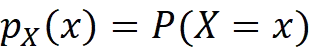
- Here P(X=x) is the probability of X=x.
- The PMF is normalized which means that the sum of the probabilities for all the possible values of X is 1:
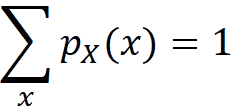

#### Continous Random Variables
***
- A ***continuous random variable*** takes on values within a range (interval), such as the height of a randomly selected person or the amount of rainfall in a given area. A continuous random variable can be described by its probability density function (PDF), which gives the density of the probability distribution at each point in the range.
- If X is a continuous random variable, the probability that X takes a value in the interval [a, b] can be written as:
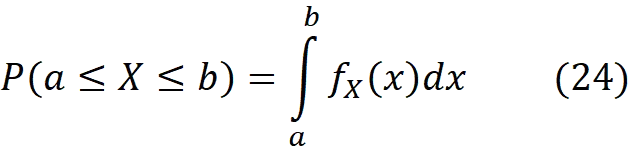
where fₓ(x) is called the probability density function (PDF) of X. 
***
**Continous Random Variable Example** <br>
1. ***Height***: The height of a person is a continuous random variable. It can take on any value between a certain minimum and maximum range, and can be measured to any level of precision. The probability density function (PDF) of height in a population is typically bell-shaped and symmetric, with most people falling in the middle range of heights.
2. ***Temperature***: Temperature is a continuous random variable that can take on any value within a certain range, and can be measured to any level of precision. The PDF of temperature in a certain area might be skewed or have multiple peaks depending on various factors such as time of day, location, and weather patterns.

### Discrete Probability Distribution

#### Bernoulli Distribution
***
**Definition** <br>
- A Bernoulli Distribution denotes the random probability of an event that only has two possible discrete outcomes like 0 and 1.
- The variable that follows Bernoulli probability distribution is known as the *Bernoulli variable* and the event is called the *Bernoulli event*.
- A random variable X has the Bernoulli distribution with parameter p (0≤p≤1) if X can take only the values 0 and 1 and the probability of each value is: 
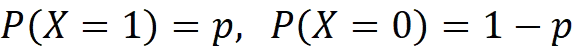
- If x is any Bernoulli variable and it can have only two discrete values whose probability lies between 0 to 1 then Probability Mass Function (PMF) of a Bernoulli distribution can be denoted mathematically as below: <br>
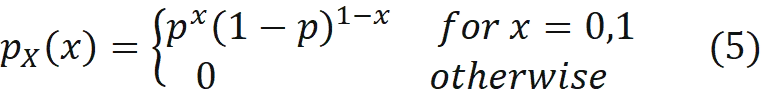
- Here for x=1 and x=0 respectively, we get:
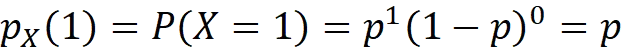
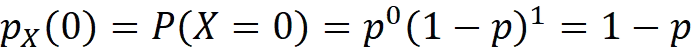

***
**Example** <br>
- The tossing of a coin is a Bernoulli event since it has only two possible discrete outcomes – Head (i.e. 1) and Tail (i.e. 0). Hence it follows the Bernoulli probability distribution.
- A random variable X with a Bernoulli distribution can represent a coin toss where X=1 and X=0 represent obtaining a head and a tail respectively, and p would be the probability of the coin landing on heads. 
- For a fair coin, we have p=0.5. The symbol ~ denotes “has the probability distribution”. So, if X has a Bernoulli distribution with parameter p, we can write:
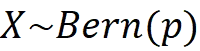


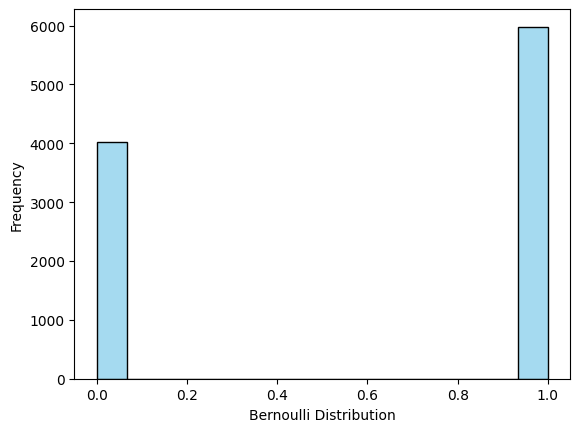

In [22]:
# bangkitkan contoh data berdistribusi bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

# plotting dataset
ax= sns.histplot(data_bern,
                 kde=False,
                 color="skyblue")
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')
plt.show()

**Coin Toss Experiment** <br>
- the probability of an event is the limit of the ratio
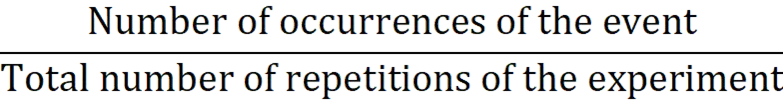
- when the number of repetitions of the experiment approaches infinity. We saw that if X has a Bernoulli distribution, then
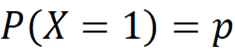
- This means that the ratio of 
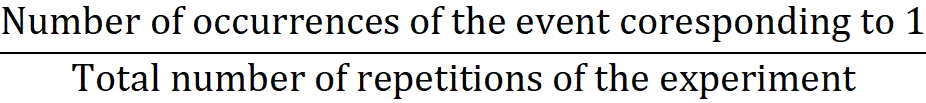
approaches p as the total number of trials tends to infinity.

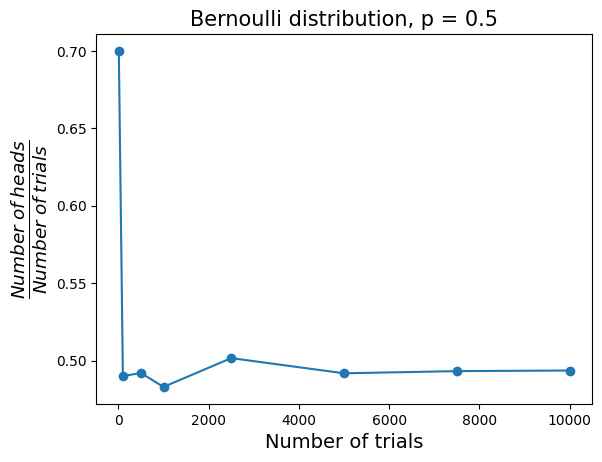

In [23]:
np.random.seed(0)
p = 0.5
sample = bernoulli.rvs(p=p, size = 10000)
num_trials = [10, 100, 500, 1000, 2500, 5000, 7500, 10000]
points = [sample[0:l].mean() for l in num_trials]
plt.plot(num_trials, points, marker='o')
plt.xlabel('Number of trials', fontsize = 14)
plt.ylabel(r'$\frac{Number\; of \; heads}{Number\; of \; trials}$',
           fontsize= 19)
plt.title("Bernoulli distribution, p = {}".format(p), fontsize= 15)
plt.show()

### Continous Probability Distribution

#### Normal Distribution
***
**Definition** <br>
- A continuous random variable X has the normal distribution with parameters µ and σ² if X has the following PDF:
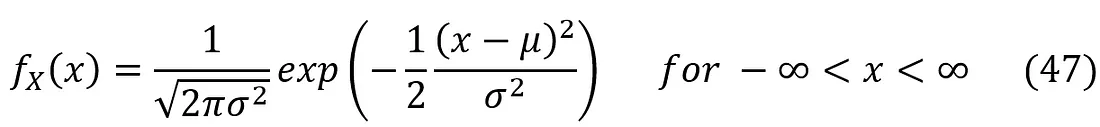
It is denoted by X ~ N(µ, σ²).
- Hence the parameters µ and σ² are the mean and variance of X (which means that σ is the standard deviation of X). This is an important property of normal distribution. 
- The mean determines the center of the distribution, while the standard deviation determines the spread or width of the distribution. 
- The shape of the normal distribution is symmetric and bell-shaped, with the majority of the observations falling near the mean and fewer observations as you move away from the mean.

***
**Examples** <br>
- The normal distribution is important because many natural phenomena and real-world data are approximately normally distributed, such as the heights of people, the weights of objects, and errors in measurements. 

***
**Shape of Normal Distribution** <br>
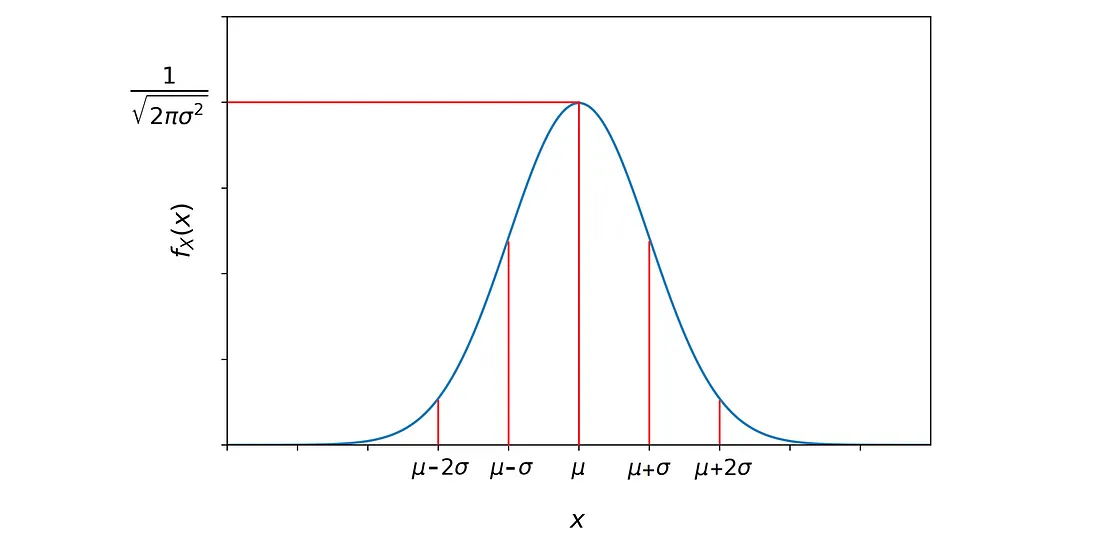

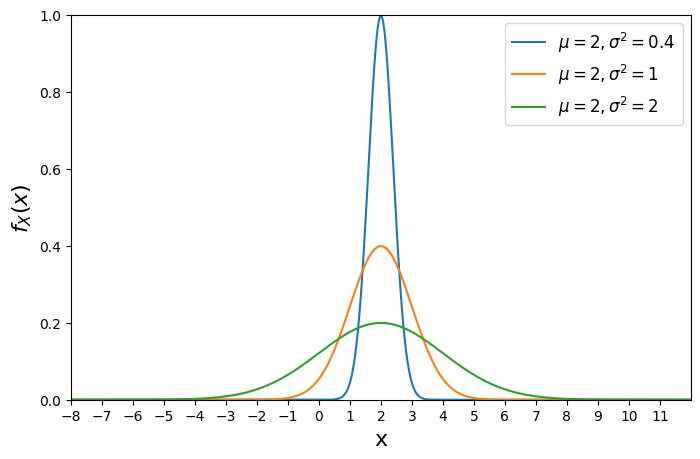

In [24]:
# create nilai random variabel dalam rentang -10 sampai 15 dalam interval 0,01
x = np.arange(-10, 15, 0.01)

# tetapkan parameter-parameter penting dalam normal distribution
mu = 2
sigma1 = 0.4
sigma2 = 1
sigma3 = 2

# hitung normal distribution untuk x dengan beberapa pengaturan parameter
y1 = norm.pdf(x, loc = mu, scale = sigma1)
y2 = norm.pdf(x, loc = mu, scale = sigma2)
y3 = norm.pdf(x, loc = mu, scale = sigma3)


plt.figure(figsize=(8, 5))

plt.plot(x, y1, label='$\mu={}, \sigma^2={}$'.format(mu, sigma1))
plt.plot(x, y2, label='$\mu={}, \sigma^2={}$'.format(mu, sigma2))
plt.plot(x, y3, label='$\mu={}, \sigma^2={}$'.format(mu, sigma3))
plt.xlabel('x', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.xlim([-8, 12])
plt.ylim([0, 1])
plt.xticks(np.arange(-8, 12, 1))    
plt.legend(loc='best', fontsize=12)

plt.show()

The methods of this object take the parameters x, loc, and scale which correspond to x, µ, and σ in Equation 47 (please note that in scipy we determine the standard deviation of the distribution, not its variance). 

**Analysis** <br>
1. The variance (or standard deviation) shows how far away from the mean the values tend to fall. Note that **the larger the variance** is, **the wider (and shorter) the PDF** is

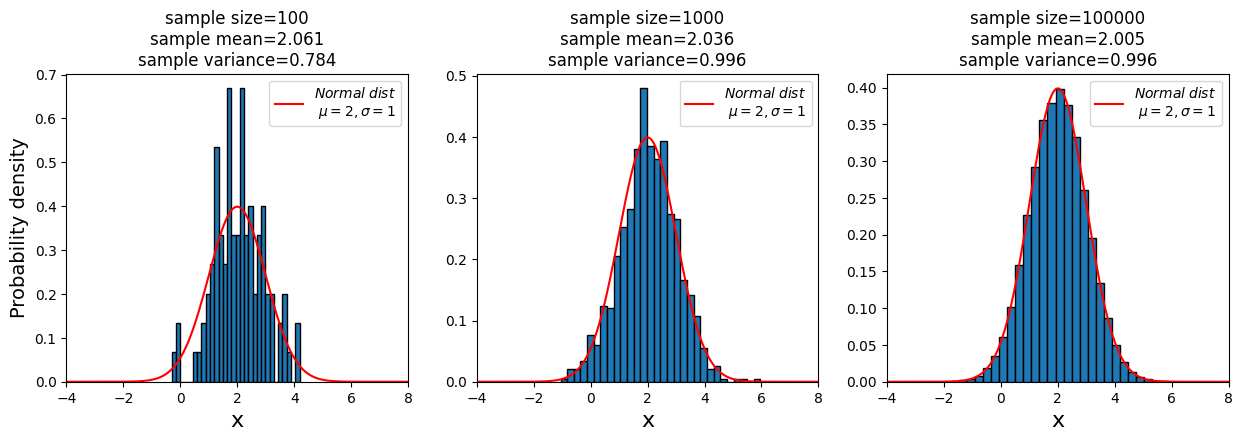

In [25]:
np.random.seed(1)

# create figure plot
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(wspace=0.2)

# create random variable value between -10 to 15 with 0,01 interval
x = np.arange(-10, 15, 0.01)

# mean sample
mu = 2
# standard deviation
sigma = 1
# create normalize distribution from x with mu and sigma
normal_dist = norm.pdf(x, loc=mu, scale=sigma)

# create some normalize distribution with different number of sample size
for i, n in enumerate([100, 1000, 100000]):
    # create random variates with normal distribution given mean, standard deviation and sample size
    sample = norm.rvs(loc=mu, scale=sigma, size=n)
    
    # calculate sample mean and variance and round the value with 3 float
    sample_mean = np.round(sample.mean(), 3)
    sample_var = np.round(sample.var(), 3)
    
    # plot the histogram
    axs[i].hist(sample, density=True, bins=30,
                edgecolor='black', linewidth=1)
    axs[i].set_xlabel('x', fontsize=16)
    axs[i].plot(x, normal_dist, color='red',
                label="$Normal \; dist$\n $\mu=2, \sigma=1$")
    axs[i].set_xlim([-4, 8])
    axs[i].set_title("sample size={}\nsample mean={}\nsample variance={}".
                     format(n, sample_mean, sample_var), fontsize=12)
    axs[i].legend(loc="best")
    
axs[0].set_ylabel('Probability density', fontsize=14)
plt.show()

**Figure Explanations** <br>
1. we take 3 random samples with different sizes from a normally distributed random variable with µ=2 and σ²=1
2. We plot the histogram of each sample and calculate its mean and variance.
3. As the sample size increases, its mean and variance get closer to µ and σ² respectively, and the shape of the histogram gets closer to the PDF of the normal distribution
4. When the sample size approaches infinity, its mean and variance approach µ, and σ² respectively.

**INTERMEZO!** <br>
***
**norm.rvs() vs norm.pdf()** <br>
1. norm.rvs()
- **rvs** means: random variates
- Random variates are simply the random values that are generated from a given probability distribution. 
- In the case of a normal distribution, the random variates are generated based on the mean (μ) and standard deviation (σ) of the distribution.
- The formula for generating random variates from a normal distribution is: **X = μ + σ * Z**. where X is the random variate to be generated, μ is the mean of the distribution, σ is the standard deviation of the distribution, and Z is a standard normal random variable with mean 0 and standard deviation 1.
- we first generate a standard normal random variable (Z) using a random number generator, and then transform it to the desired normal distribution

2. norm.pdf()
- **pdf** mean: probability density function
- norm.pdf() is function in scipy to calculate PDF in normal distribution

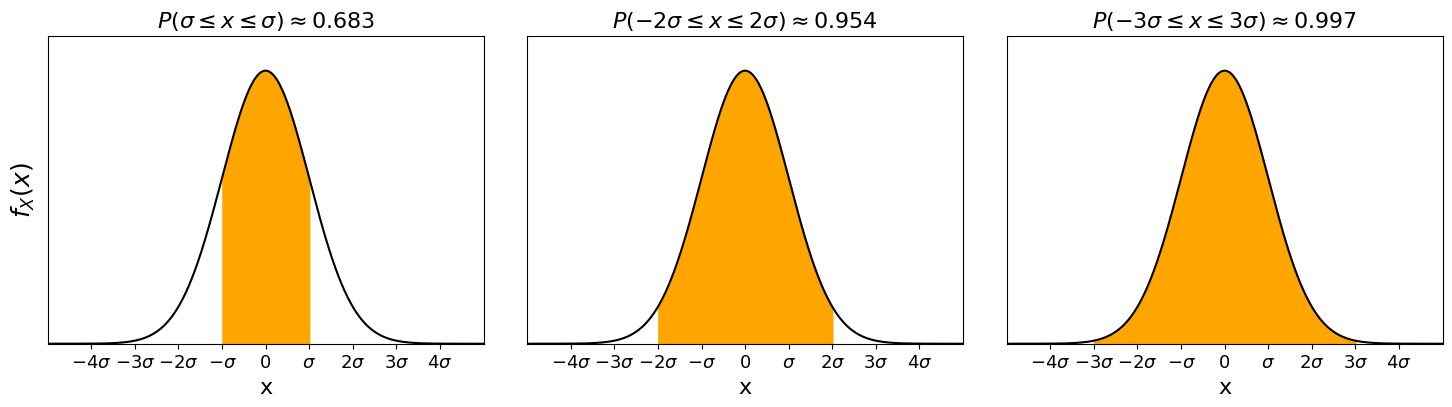

In [26]:
# create figure canvas before plotting any visualized images
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
plt.subplots_adjust(wspace=0.1)

# create random value between -10 to 15 with interval 0,01
x = np.arange(-10, 15, 0.01)

# define mean and standard deviation
mu = 0
sigma = 1

# calculate pdf from given x, miu, and standard deviation
normal_dist = norm.pdf(x, loc=mu, scale=sigma)

# plot the three rules (68, 95, and 99,7)
for i in range(3):
    # plot line plot of pdf normal distribution 
    axs[i].plot(x, normal_dist, color='black')
    
    # calculate 1 std, 2 std and 3 std
    xs = (i+1) * sigma
    val = norm.cdf(xs) - norm.cdf(-xs)
    
    # plot a shaded area between standard deviation
    axs[i].fill_between(x, normal_dist, 0,
                        where=(x >= -xs) & (x <= xs), color='orange')
    axs[i].set_xlim([-5, 5])
    axs[i].set_ylim([0, 0.45])
    
    # set the each of figure title
    if xs != 1:
        axs[i].set_title(r"$P({0}\sigma \leq x \leq {1}\sigma) \approx {2}$".
                         format(-xs, xs, np.round(val, 3)), fontsize=16)
    else:
        axs[i].set_title(r"$P(\sigma \leq x \leq \sigma) \approx {0}$".
                         format(np.round(val, 3)), fontsize=16)
    
    # update the x axis label
    axs[i].set_xlabel('x', fontsize=16)
    axs[i].set_xticks(np.arange(-4*sigma, 4*sigma+1, sigma))
    fig.canvas.draw()
    labels = [item.get_text() for item in axs[i].get_xticklabels()]
    new_labels = [(item + r"$\sigma$").replace('1', '').replace('-1', '')
                  if item != '0' else item for item in labels]
    axs[i].set_xticklabels(new_labels, fontsize=13)
    axs[i].set_yticks([])
    
axs[0].set_ylabel('$f_X(x)$', fontsize=18)
plt.show()

**Explanation of Rule 68-95-99.7** <br>
***
1. If X has a normal distribution with parameters µ and σ², the probability that its value falls within one standard deviation of the mean is roughly 0.66. Mathematically: 
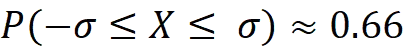
2. which means that P(-σ ≤ X ≤ σ) is the area under the PDF curve between x=-σ and x=σ. Similarly, we have:
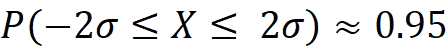
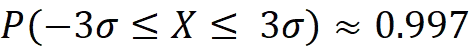

# Regression Analysis

## Introduction to Terminology
***
1. **Dataset**
- Sekumpulan data yang mengandung fitur-fitur yang penting untuk menyelesaikan masalah
2. **Fitur atau Atribut atau Prediktor atau Variabel**
- Atribut atau objektif yang dimiliki oleh data agar dapat memahami data sebelum masuk ke model machine learning
- 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, 
- The **dependent features** are called the dependent variables, outputs, or responses. 
- The **independent features** are called the independent variables, inputs, regressors, or predictors.
3. **Model**
- Representasi dari sebuah algoritma machine learning hasil pembelajaran. Model adalah keluaran yang dihasilkan dalam fase pelatihan sebuah algoritma machine learning

## Definition of Regression
***
- Regression searches for relationships among **variables**. 
- For example, you can observe several employees of some company and try to understand how their salaries depend on their **features**, such as experience, education level, role, city of employment, and so on.
- Similarly, you can try to establish the mathematical dependence of housing prices on area, number of bedrooms, distance to the city center, and so on
- It’s a common practice to denote the outputs with 𝑦 and the inputs with 𝑥. If there are two or more independent variables, then they can be represented as the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of inputs.

## When Do You Need Regression?
***
- Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related.
- For example, you can use it to determine if and to what extent experience or gender impacts salaries.
- Regression is also useful when you want to forecast a response using a new set of predictors. 
- For example, you could try to predict electricity consumption of a household for the next hour given the outdoor temperature, time of day, and number of residents in that household.

## Linear Regression

### Problem Formulation
***
- When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the **regression equation**. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the **regression coefficients**, and 𝜀 is the **random error**. 𝛽₀ is also called **intercept**

- Linear regression **calculates the estimators of the regression coefficients** or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. These estimators define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ. This function should capture the dependencies between the inputs and output sufficiently well.

- The estimated or predicted response, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding actual response 𝑦ᵢ. The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the **residuals**. 

- **Notes**: Regression is about determining the best predicted weights—that is, the weights corresponding to the smallest residuals.

- To get the best weights, you usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛: **SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))²**. This approach is called the method of ordinary least squares (OLS).

### Linear Regression on Dummy Data

#### Install Library First!

In [27]:
# install your libs first!
# %pip install scikit-learn

#### Provide Data

In [28]:
X = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])
X

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [29]:
y

array([ 5, 20, 14, 32, 22, 38])

#### Create Linear Regression Model and Fit

In [30]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)


# tampilkan nilai prediksi y
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [31]:
# cari berapa gradient (aka regression coefficient) and intercept
print('Gradient = ',model.coef_)
print('Intercept = ', model.intercept_)

Gradient =  [0.54]
Intercept =  5.633333333333329


In [34]:
# cara menentukan y pred lain dari formula linear regression
y_pred2 = model.coef_ * X + model.intercept_
y_pred2

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

**Penjelasan** <br>
- Hasilnya sama antara perhitungan yang disajikan library dengan cara manual

#### Plot the regression line

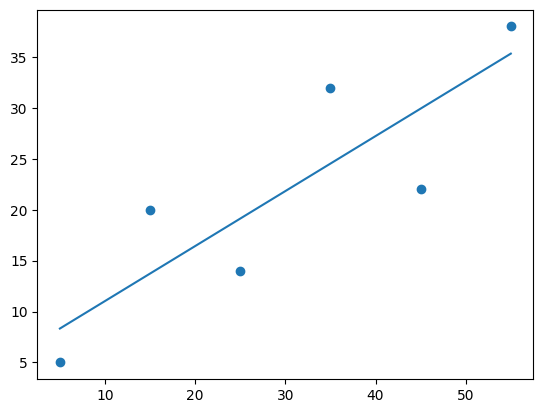

In [33]:
plt.scatter(X,y)
plt.plot(X,y_pred)

### Linear Regression on Real Dataset 

#### Load External Dataset (Boston Dataset)
***
**Source** <br>
- https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
- https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [37]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


#### Dataset Understanding
***
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollar
- PTRATIO  pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

#### Get the Predictor and Target

In [56]:
# define predictor (rm) and target
X = data['rm']
y = data["medv"]

In [57]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [58]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

#### Implementing Linear Regression using Statsmodel

In [59]:
import statsmodels.api as sm

In [82]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
predictions

array([24.02077888, 23.45816292, 26.24932262, 25.5661461 , 26.11049531,
       23.49104307, 21.9639426 , 22.54847867, 20.5720161 , 21.9347158 ,
       23.2974155 , 21.95298255, 21.51458051, 21.73378153, 22.27082404,
       21.31364623, 21.68263462, 21.8835689 , 19.93267978, 20.92273774,
       20.34916173, 21.79223514, 22.43887816, 21.23692588, 21.64244777,
       20.45510889, 21.23692588, 22.09180987, 23.72851085, 24.38246057,
       20.87159084, 22.18314363, 21.73743488, 20.82775063, 22.27082404,
       21.67532792, 21.33921969, 21.37209984, 21.79588849, 24.09384589,
       25.66113321, 24.73318221, 22.53751862, 22.69095933, 22.17218358,
       20.75833697, 21.13828541, 22.02970291, 19.72443881, 20.46606894,
       21.78492844, 22.3402377 , 23.78696445, 21.9127957 , 21.51092716,
       26.48313705, 23.3193356 , 24.90123633, 22.44983821, 21.65340782,
       20.97388465, 21.79588849, 23.58603018, 24.7039554 , 25.95340124,
       22.97957402, 21.14193876, 21.47439365, 20.43684214, 21.49

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):                   3.74e-256
Time:                        09:45:11   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Implementing Linear Regression using Scikit-learn

In [69]:
# prepare predictor for predefined format in scikit-learn
X = X.to_numpy().reshape((-1,1))

In [70]:
lm = LinearRegression()
model = lm.fit(X,y)
predictions_scikit_learn = lm.predict(X)
predictions_scikit_learn

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

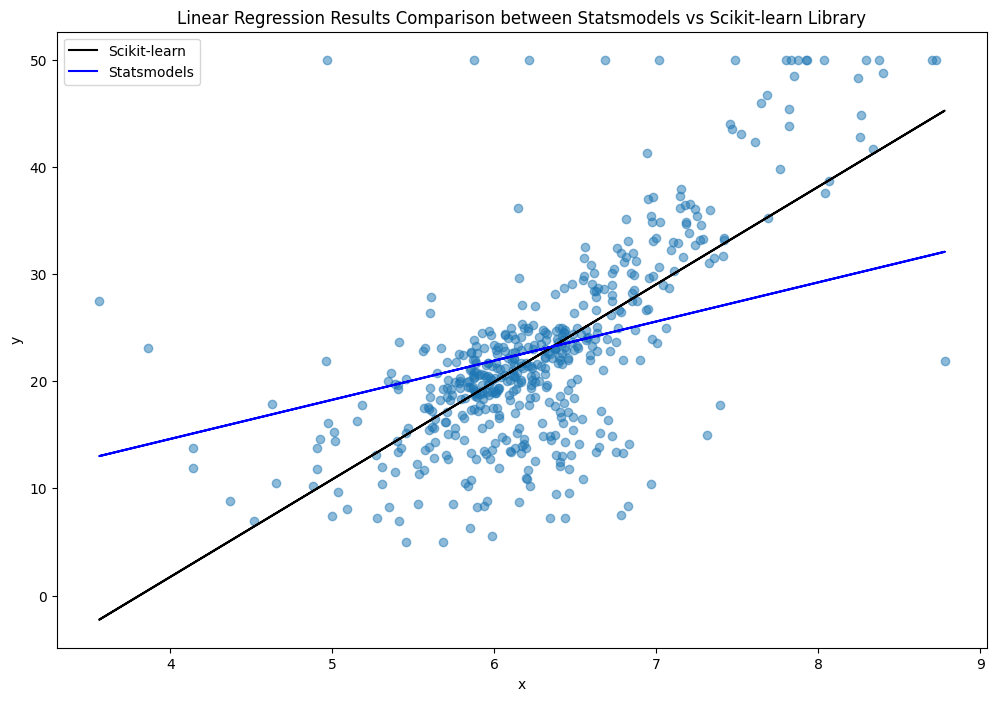

In [86]:
plt.figure(figsize=(12,8))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions_scikit_learn, color='black', label='Scikit-learn')
plt.plot(X, predictions, color='blue', label='Statsmodels')
plt.title('Linear Regression Results Comparison between Statsmodels vs Scikit-learn Library')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Assignment

## Assignment 1

The average test score in a chemistry class is normally distributed with a standard deviation of 6.5. 100 skor diperoleh secara random dengan rerata skor sebesar 82: <br>
- (a) Find a 90% confidence interval for the population mean test score
- (b) What is the value of the margin of error?

# References

**Confidence Interval** <br>
- https://www.analyticsvidhya.com/blog/2022/01/understanding-confidence-intervals-with-python/
- https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b
- *Type of Distribution with Math Explanation in Brief*: https://towardsdatascience.com/understanding-probability-distributions-using-python-9eca9c1d9d38
- *Linear Regression* : https://realpython.com/linear-regression-in-python/